In [100]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

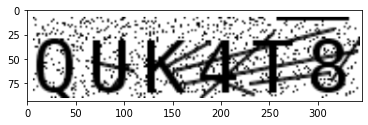

In [158]:
image_brg = cv2.imread('../images/captcha_images/vtop_captcha/quk4t8.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image_brg, cmap='gray')

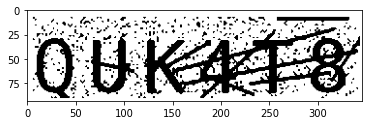

In [159]:
(thresh, image_bin) = cv2.threshold(image_brg, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh
plt.imshow(image_bin, cmap='gray')

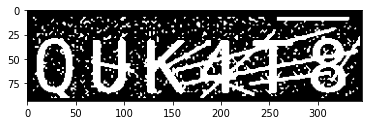

In [160]:
image_neg = cv2.bitwise_not(image_bin)
plt.imshow(image_neg, cmap='gray')

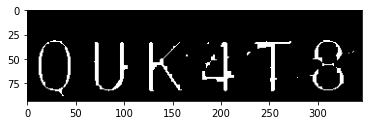

In [161]:
image_erd = cv2.erode(image_neg, np.ones(shape=(3, 3)), iterations=2)
plt.imshow(image_erd, cmap='gray')

Original Dimensions :  (94, 346)
Resized Dimensions :  (470, 1730)


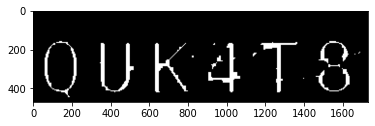

In [162]:
# upscale image
print('Original Dimensions : ', image_erd.shape)
 
scale_percent = 500 # percent of original size
width = int(image_erd.shape[1] * scale_percent / 100)
height = int(image_erd.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
image_resized = cv2.resize(image_erd, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ', image_resized.shape)
plt.imshow(image_resized, cmap='gray')

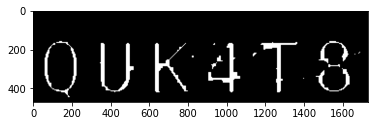

In [163]:
image_blur = cv2.medianBlur(image_resized, ksize=3)
plt.imshow(image_blur, cmap='gray')

In [164]:
image_brg_threshold = cv2.adaptiveThreshold(image_brg_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 7)
plt.imshow(image_brg_threshold, cmap='gray')

NameError: name 'image_brg_blur' is not defined